# Cleaning and Working with Survey Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_data.csv", index_col='ID')

In [3]:
df.head(3)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,3-6 hours per week,Rizzo the Rat,Maybe,Maybe,Paper
2,6/21/2024 13:23,33,USA,59086,5,NaN,6-8 hours per week,Gonzo the Great,Maybe,No,Scissors
3,6/21/2024 13:35,52,USA,97219,0,0.0,1-3 hours per week,Beaker. A thousand times Beaker.,Maybe,Maybe,Rock


In [4]:
df.describe()

,Age,Min Sib,Max Sib
count,125.00000,125.000000,117.000000
mean,47.50400,1.504000,2.170940
std,86.84679,1.241903,1.036328
min,8.00000,0.000000,0.000000
25%,29.00000,1.000000,2.000000
50%,40.00000,1.000000,2.000000
75%,48.00000,1.000000,2.000000
max,999.00000,5.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 125
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            125 non-null    object 
 1   Age                  125 non-null    int64  
 2   Country              125 non-null    object 
 3   Postal Code          124 non-null    object 
 4   Min Sib              125 non-null    int64  
 5   Max Sib              117 non-null    float64
 6   TV_Amount            125 non-null    object 
 7   Muppet               125 non-null    object 
 8   Ghost_Belief         124 non-null    object 
 9   Ghost_Encounter      125 non-null    object 
 10  Rock_Paper_Scissors  125 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.7+ KB


### Cleaning up the Country column

In [6]:
df['Country'].to_string()

'ID\n1                  United States\n2                            USA\n3                            USA\n4       United States of America\n5                 United States \n6                            USA\n7                            Usa\n8                             us\n9                            USA\n10                 United States\n11                 United States\n12                United States \n13                       Wakanda\n14                            US\n15                      America \n16                 United States\n17     United States of America \n18                United States \n19                United States \n20                           USA\n21                          USA \n22                           USA\n23                 United States\n24     United States of America \n25                           USA\n26      United States of America\n27                            US\n28                            UK\n29                           Usa\n30       

In [7]:
for i in df.index:
    if 'united' in df.loc[i, 'Country'] or 'United' in df.loc[i, 'Country'] or 'Untied' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'United States'
    # elif 'us' in df.loc[i, 'Country']:
    #     # df.loc[i, 'Country'] = 'United States'
    elif 'Usa' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'United States'
    elif 'US' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'United States'
    elif 'usa' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'United States'
    elif 'America' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'United States'
    elif df.loc[i, 'Country'] == 'us':
        df.loc[i, 'Country'] = 'United States'
    elif 'Aus' in df.loc[i, 'Country']:
        df.loc[i, 'Country'] = 'Australia'

In [8]:
df['Country'].to_string()

'ID\n1      United States\n2      United States\n3      United States\n4      United States\n5      United States\n6      United States\n7      United States\n8      United States\n9      United States\n10     United States\n11     United States\n12     United States\n13           Wakanda\n14     United States\n15     United States\n16     United States\n17     United States\n18     United States\n19     United States\n20     United States\n21     United States\n22     United States\n23     United States\n24     United States\n25     United States\n26     United States\n27     United States\n28                UK\n29     United States\n30     United States\n31     United States\n32     United States\n33     United States\n34     United States\n35     United States\n36     United States\n37     United States\n38     United States\n39     United States\n40     United States\n41     United States\n42     United States\n43     United States\n44     United States\n45         Australia\n46   

### Cleaning up the TV_Amount column

In [9]:
print((1 + 3) / 2)
print((3 + 6) / 2)
print((6 + 8) / 2)

2.0
4.5
7.0


In [10]:
for i in df.index:
    if '1-3' in df.loc[i, 'TV_Amount']:
        df.loc[i, 'TV_Amount'] = 2
    elif '3-6' in df.loc[i, 'TV_Amount']:
        df.loc[i, 'TV_Amount'] = 4.5
    elif '6-8' in df.loc[i, 'TV_Amount']:
        df.loc[i, 'TV_Amount'] = 7
    elif 'More than 8' in df.loc[i, 'TV_Amount']:
        df.loc[i, 'TV_Amount'] = 12
    elif 'Less than 1' in df.loc[i, 'TV_Amount']:
        df.loc[i, 'TV_Amount'] = .5
    else:
        df.loc[i, 'TV_Amount'] = 0

In [11]:
df.head(10)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker. A thousand times Beaker.,Maybe,Maybe,Rock
4,6/21/2024 13:40,65,United States,55118,5,NaN,12,Fozzie Bear,Yes,Yes,Paper
5,6/21/2024 13:50,51,United States,55116,1,2.0,12,Animal,Yes,Maybe,Rock
6,6/21/2024 14:01,28,United States,43207,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Rock
7,6/21/2024 14:02,40,United States,53704,1,2.0,0.5,I do not have a favorite Muppet,No,No,Rock
8,6/21/2024 14:18,48,United States,54016,3,4.0,0.5,Kermit the Frog,Maybe,Yes,Rock
9,6/21/2024 14:18,51,United States,54016,1,2.0,12,Animal,Maybe,Maybe,Rock


### Cleaning up the Muppet column:

In [12]:
df.head(3)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker. A thousand times Beaker.,Maybe,Maybe,Rock


In [13]:
# Pulling the values from Muppet column, and deduplicating to look for any cleanup from people entering data as free text

muppets = df['Muppet']
muppets.drop_duplicates()

ID
1                          Rizzo the Rat
2                        Gonzo the Great
3      Beaker.  A thousand times Beaker.
4                            Fozzie Bear
5                                 Animal
7        I do not have a favorite Muppet
8                        Kermit the Frog
12                      The Swedish Chef
14                                Beaker
15                            Miss Piggy
20                      Oscar the Grouch
22                           Mahna Mahna
108                                 Pepe
124                        Cooke Monster
Name: Muppet, dtype: object

In [14]:
# Looping through Muppet column to fix the couple odd values that showed up

for i in df.index:
    if 'Beaker' in df.loc[i, 'Muppet']:
        df.loc[i, 'Muppet'] = 'Beaker'
    elif 'Cooke' in df.loc[i, 'Muppet']:
        df.loc[i, 'Muppet'] = "Cookie Monster"

df.head(3)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker,Maybe,Maybe,Rock


## Now that we've got some nice clean data...

### Using `groupby` with the survey data

In [15]:
# What is the count of responses by favorite muppet?
# What are we able to determine from the count values?

fav_muppets = df.groupby(['Muppet']).count()
fav_muppets

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
Muppet,,,,,,,,,,
Animal,23,23,23,23,23,22,23,23,23,23
Beaker,4,4,4,4,4,3,4,4,4,4
Cookie Monster,1,1,1,1,1,1,1,1,1,1
Fozzie Bear,11,11,11,10,11,7,11,11,11,11
Gonzo the Great,18,18,18,18,18,17,18,18,18,18
I do not have a favorite Muppet,22,22,22,22,22,22,22,22,22,22
Kermit the Frog,23,23,23,23,23,22,23,23,23,23
Mahna Mahna,1,1,1,1,1,1,1,1,1,1
Miss Piggy,17,17,17,17,17,17,17,16,17,17


In [16]:
# Let's break out numeric columns from df into a new DataFrame...

df_num = df.drop(['Timestamp', 'Country', 'Postal Code', 'Ghost_Belief', 'Ghost_Encounter', 'Rock_Paper_Scissors'], axis=1)
df_num.head(3)

,Age,Min Sib,Max Sib,TV_Amount,Muppet
ID,,,,,
1,42,1,2.0,4.5,Rizzo the Rat
2,33,5,NaN,7,Gonzo the Great
3,52,0,0.0,2,Beaker


In [17]:
# Now let's try some other aggregations with groupby, like average values (rounded to 1 decimal place)...

df_mean = df_num.groupby(['Muppet']).mean().round(1)
df_mean

,Age,Min Sib,Max Sib,TV_Amount
Muppet,,,,
Animal,43.9,1.2,1.9,7.76087
Beaker,37.2,1.8,1.3,5.75
Cookie Monster,25.0,3.0,4.0,12.0
Fozzie Bear,130.7,3.1,2.9,5.863636
Gonzo the Great,39.8,1.4,2.1,7.416667
I do not have a favorite Muppet,39.5,1.5,2.5,6.272727
Kermit the Frog,39.3,1.5,2.3,6.717391
Mahna Mahna,13.0,3.0,4.0,2.0
Miss Piggy,35.8,1.0,1.8,6.323529


In [18]:
# And how about median values?

df_med = df_num.groupby(['Muppet']).median()
df_med

,Age,Min Sib,Max Sib,TV_Amount
Muppet,,,,
Animal,44.0,1.0,2.0,7.0
Beaker,39.0,1.0,2.0,4.5
Cookie Monster,25.0,3.0,4.0,12.0
Fozzie Bear,43.0,3.0,4.0,4.5
Gonzo the Great,40.5,1.0,2.0,7.0
I do not have a favorite Muppet,37.5,1.0,2.0,4.5
Kermit the Frog,41.0,1.0,2.0,7.0
Mahna Mahna,13.0,3.0,4.0,2.0
Miss Piggy,32.0,1.0,2.0,4.5


In [19]:
# How about viewing our original data grouped by whether or not the respondent believes in ghosts?

df_ghost = df.groupby(["Ghost_Belief"]).count()
df_ghost

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Encounter,Rock_Paper_Scissors
Ghost_Belief,,,,,,,,,,
Maybe,47,47,47,47,47,44,47,47,47,47
No,33,33,33,32,33,31,33,33,33,33
Yes,44,44,44,44,44,41,44,44,44,44


In [20]:
# And how about mean values of numeric data grouped by Ghost_Belief?

df_num2 = df.drop(['Timestamp', 'Country', 'Postal Code', 'Muppet', 'Ghost_Encounter', 'Rock_Paper_Scissors'], axis=1)

df_ghost_num = df_num2.groupby('Ghost_Belief').mean().round(1)
df_ghost_num

,Age,Min Sib,Max Sib,TV_Amount
Ghost_Belief,,,,
Maybe,57.9,1.5,2.2,5.989362
No,43.5,1.5,2.3,7.181818
Yes,39.9,1.5,2.0,7.340909


In [21]:
# Let's sort that one by age

df_ghost_num.sort_values('Age')

,Age,Min Sib,Max Sib,TV_Amount
Ghost_Belief,,,,
Yes,39.9,1.5,2.0,7.340909
No,43.5,1.5,2.3,7.181818
Maybe,57.9,1.5,2.2,5.989362


# Plotting data from the survey

## Example histogram

In [22]:
df.head(3)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker,Maybe,Maybe,Rock


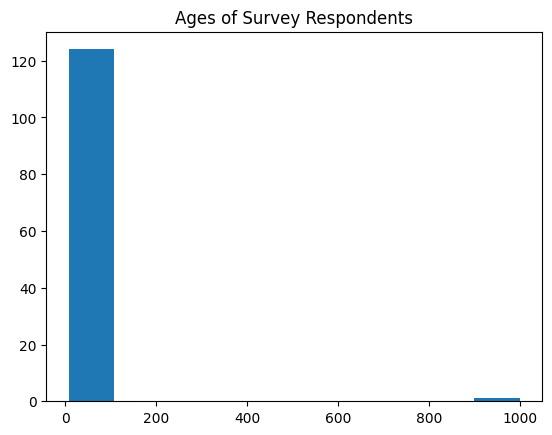

In [23]:
plt.hist(df['Age'])

plt.title('Ages of Survey Respondents')

plt.show()

Oh no! That's not a very useful histogram, is it? That pesky 999-year-old from Wakanda is throwing off our results.

If we drop that record from the data, then we will get a better looking result.

In [24]:
# Quick loop to find any records where age is over 200
# From the result, one record is returned (as a Series), with an index name of 13 (labeled down at the bottom)

for i in df.index:
    if df.loc[i, 'Age'] > 200:
        print(df.loc[i])

Timestamp              6/21/2024 19:26
Age                                999
Country                        Wakanda
Postal Code                   UHG-966a
Min Sib                              5
Max Sib                            NaN
TV_Amount                          4.5
Muppet                     Fozzie Bear
Ghost_Belief                     Maybe
Ghost_Encounter                  Maybe
Rock_Paper_Scissors              Paper
Name: 13, dtype: object


In [25]:
# Dropping record 13 from df, then verifying by pulling up records 10 through 14 to see that 13 is gone

df.drop(13, axis=0, inplace=True)
df.loc[10:14]

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
ID,,,,,,,,,,,
10,6/21/2024 14:40,43,United States,54016,3,4.0,4.5,Fozzie Bear,Maybe,Maybe,Scissors
11,6/21/2024 14:52,52,United States,55104,1,2.0,12,Animal,Yes,Maybe,Paper
12,6/21/2024 16:17,42,United States,55331,1,2.0,12,The Swedish Chef,Maybe,No,Paper
14,6/21/2024 19:29,42,United States,55447,1,2.0,2,Beaker,Maybe,Maybe,Scissors


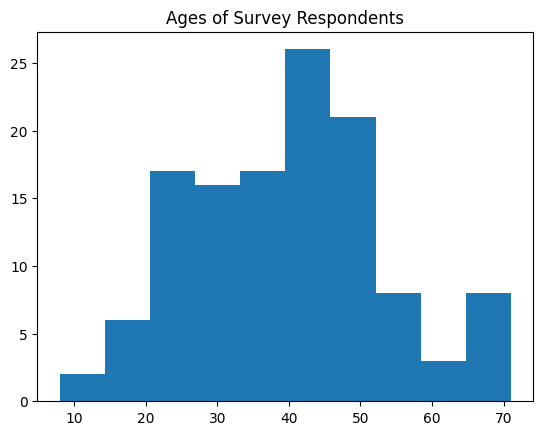

In [26]:
# Trying our Age histogram again...

plt.hist(df['Age'])

plt.title('Ages of Survey Respondents')

plt.show()

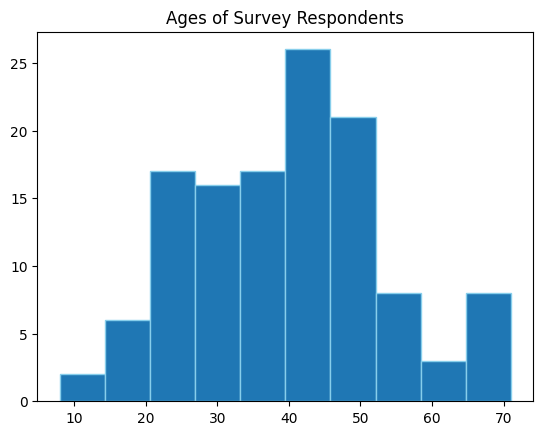

In [27]:
# Adding some formatting to outline the bars:

plt.hist(df['Age'], edgecolor='skyblue')

plt.title('Ages of Survey Respondents')

plt.show()

## Example pie chart

Let's try the same data as a pie chart ...

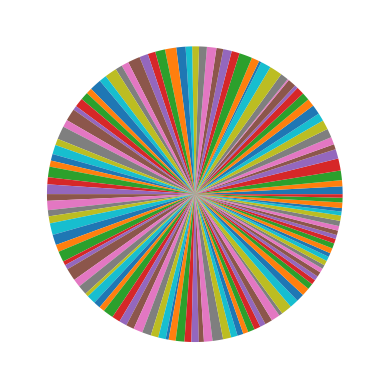

In [28]:
plt.pie(df['Age'])

plt.show()

Oh dear! Our pie chart is graphing every single age in the Age column. 

We can try to do some grouping of this data to get more meaningful results.

In [29]:
# Grouping `df` by the Age column, with a count of responses for each other column
ages = df.groupby(['Age']).count()

ages.head(5)

,Timestamp,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
Age,,,,,,,,,,
8,1,1,1,1,1,1,1,1,1,1
13,1,1,1,1,1,1,1,1,1,1
16,1,1,1,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1,1,1,1
19,4,4,4,4,3,4,4,4,4,4


In [30]:
# The count of Timestamp should be a reliable count of the number of responses for a given age, since every record will have a timestamp.
# That means we can use ages['Timestamp'] for our pie chart values.
# We'll want to use ages['Age'] for the value labels -- but right now, "Age" is actually the row label, not a column. So first, we'll need
# to reset the index to move Ages back into its own column.

ages = ages.reset_index()
ages.head(5)

,Age,Timestamp,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
0,8,1,1,1,1,1,1,1,1,1,1
1,13,1,1,1,1,1,1,1,1,1,1
2,16,1,1,1,1,1,1,1,1,1,1
3,18,1,1,1,1,1,1,1,1,1,1
4,19,4,4,4,4,3,4,4,4,4,4


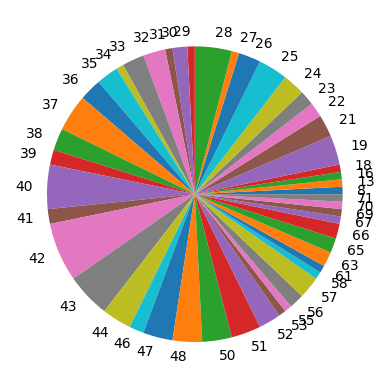

In [31]:
# Now let's try that pie chart again ...

plt.pie(ages['Timestamp'], labels=(ages['Age']))

plt.show()

Well, that works, but it's not very pretty, is it? This is why the histogram visualization is so helpful, with its built-in "bins" attribute. If you really want to stick with a pie chart, you could do some more work with your data to use some conditional logic to populate a new "Age Range" column based on the value of "Age."

In [32]:
for i in df.index:
    if df.loc[i, 'Age'] < 18:
        df.loc[i, 'Age Range'] = 'Under 18'
    elif df.loc[i, 'Age'] < 25:
        df.loc[i, 'Age Range'] = '18-24'
    elif df.loc[i, 'Age'] < 30:
        df.loc[i, 'Age Range'] = '25-29'
    elif df.loc[i, 'Age'] < 35:
        df.loc[i, 'Age Range'] = '30-34'
    elif df.loc[i, 'Age'] < 40:
        df.loc[i, 'Age Range'] = '35-39'
    elif df.loc[i, 'Age'] < 45:
        df.loc[i, 'Age Range'] = '40-44'
    elif df.loc[i, 'Age'] < 50:
        df.loc[i, 'Age Range'] = '45-49'
    else:
        df.loc[i, 'Age Range'] = '50 or older'

df.head(3)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors,Age Range
ID,,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper,40-44
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors,30-34
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker,Maybe,Maybe,Rock,50 or older


In [33]:
# Using groupby with the new Age Range column ...

age_range = df.groupby(['Age Range']).count()
age_range = age_range.reset_index()
age_range.head(5)

,Age Range,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors
0,18-24,15,15,15,15,15,14,15,15,15,15,15
1,25-29,14,14,14,14,14,14,14,14,13,14,14
2,30-34,10,10,10,10,10,8,10,10,10,10,10
3,35-39,16,16,16,15,16,15,16,16,16,16,16
4,40-44,26,26,26,26,26,25,26,26,26,26,26


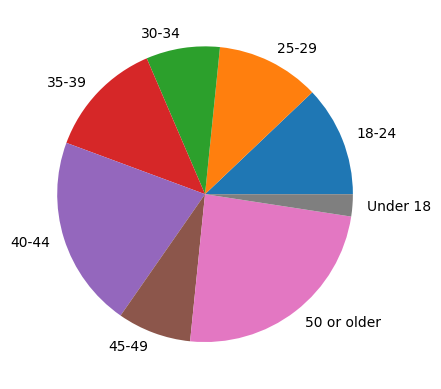

In [34]:
# One more try with that pie chart ...

plt.pie(age_range['Timestamp'], labels=(age_range['Age Range']))

plt.show()

In [35]:
df.head(5)

,Timestamp,Age,Country,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors,Age Range
ID,,,,,,,,,,,,
1,6/21/2024 12:50,42,United States,60189,1,2.0,4.5,Rizzo the Rat,Maybe,Maybe,Paper,40-44
2,6/21/2024 13:23,33,United States,59086,5,NaN,7,Gonzo the Great,Maybe,No,Scissors,30-34
3,6/21/2024 13:35,52,United States,97219,0,0.0,2,Beaker,Maybe,Maybe,Rock,50 or older
4,6/21/2024 13:40,65,United States,55118,5,NaN,12,Fozzie Bear,Yes,Yes,Paper,50 or older
5,6/21/2024 13:50,51,United States,55116,1,2.0,12,Animal,Yes,Maybe,Rock,50 or older


In [36]:
# The column for Country should also make a nice pie chart

country = df.groupby(['Country']).count()
country = country.reset_index()
country.head(3)

,Country,Timestamp,Age,Postal Code,Min Sib,Max Sib,TV_Amount,Muppet,Ghost_Belief,Ghost_Encounter,Rock_Paper_Scissors,Age Range
0,Australia,2,2,2,2,2,2,2,2,2,2,2
1,Italy,1,1,1,1,1,1,1,1,1,1,1
2,UK,1,1,1,1,1,1,1,1,1,1,1


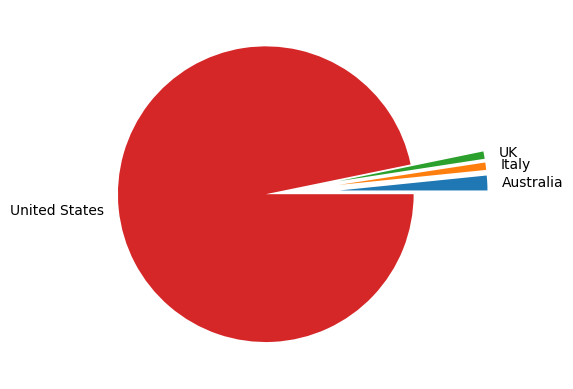

In [39]:
# The column for Country should also make a nice pie chart
# Adding an "explode" argument to pop out the non-US wedges

plt.pie(country['Timestamp'], labels=(country['Country']), explode=[.5, .5, .5, 0])

plt.show()

## Using subplots

TypeError: Axes.bar() missing 1 required positional argument: 'height'

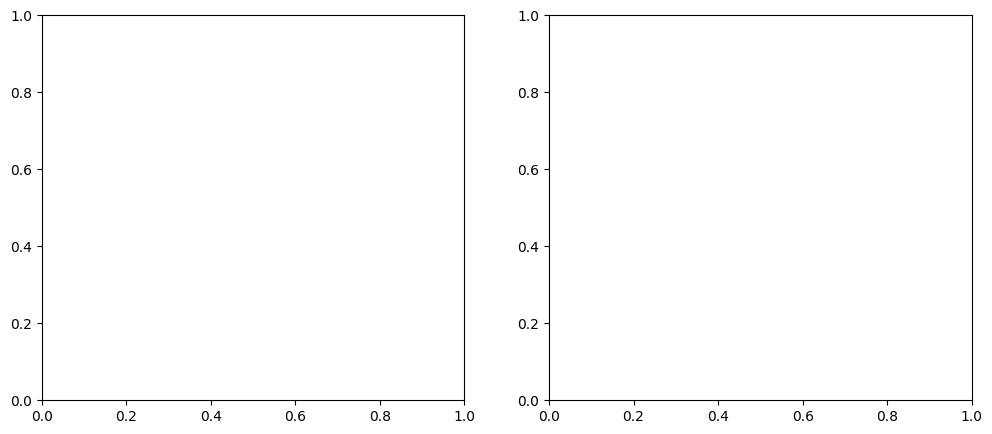

In [40]:
# Let's try a subplot comparison of belief in ghosts versus seeing a ghost...

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(df['Ghost_Belief'])
axes[1].bar(df['Ghost_Encounter'])

plt.show()